# Exploración de datos de viviendas

In [2]:
# Librerias básicas
import pandas as pd
import numpy as np

# Librerias de visualiación
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.neighbors import KNeighborsRegressor

## Exploramos los datos

In [3]:
# Verificamos cabeceras
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Interpretamos las variables

- **id**: Un identificador único para cada vivienda.   
- **date**: La fecha en la que se registró la información sobre la vivienda.  
- **price**: El precio de venta de la vivienda.  
- **bedrooms**: El número de dormitorios en la vivienda.  
- **bathrooms**: El número de baños en la vivienda.  
- **sqft_living**: Metros cuadrados de espacio habitable en la vivienda.  
- **sqft_lot**: Metros cuadrados del terreno en el que se encuentra la vivienda.  
- **floors**: Número de pisos en la vivienda.  
- **waterfront**: Variable binaria que indica si la vivienda tiene vista al agua (1 si tiene vista, 0 si no).  
- **view**: Nivel de vista de la vivienda (0-4), donde 0 puede indicar "sin vista".  
- **grade**: Clasificación de la calidad general de la vivienda (1-13), donde valores más altos indican una vivienda de mayor calidad.  
- **sqft_above**: Metros cuadrados de espacio habitable en la vivienda por encima del nivel del suelo.  
- **sqft_basement**: Metros cuadrados de espacio habitable en el sótano de la vivienda.  
- **yr_built**: Año en que se construyó la vivienda.  
- **yr_renovated**: Año en que se realizó la renovación de la vivienda.  
- **zipcode**: Código postal de la ubicación de la vivienda.  
- **lat**: Latitud de la ubicación de la vivienda.  
- **long**: Longitud de la ubicación de la vivienda.  
- **sqft_living15**: Metros cuadrados de espacio habitable promedio de las 15 viviendas más cercanas.  
- **sqft_lot15**: Metros cuadrados del terreno promedio de las 15 viviendas más cercanas.  

In [4]:
# Verificamos datos nulos
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Verificamos que tipo de datos contamos
'''
int64 : Enteros sin decimales
object : cadenas de texto (strings), listas, diccionarios y otros tipos de datos más complejos.
float64 : numeros con parte decimal
'''
data = pd.read_csv("kc_house_data.csv")
print(data.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


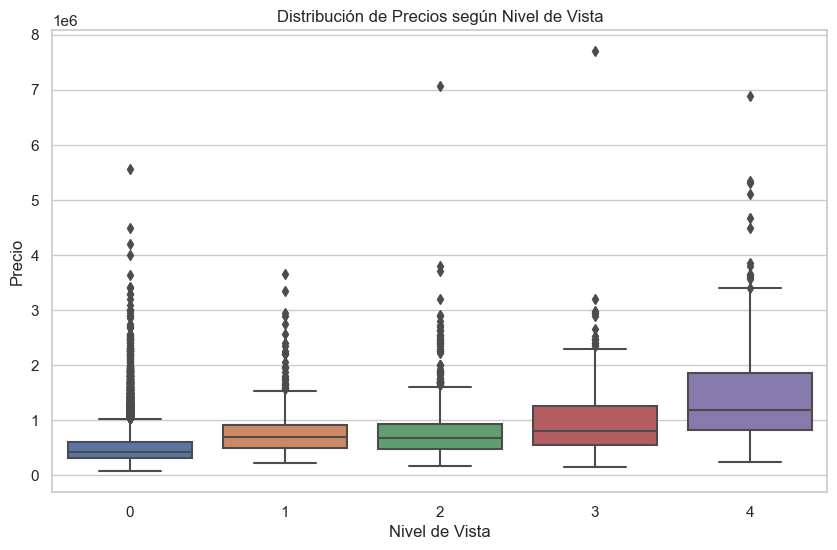

In [12]:
'''
Corroboramos si el nivel de vista esta relacionado al precio.
Definimos que en el nivel 1 y 2 no hay gran relevancia, 
sin embargo tanto en 0, 3 y 4 si que hay una variante significativa
'''
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='view', y='price')
plt.title('Distribución de Precios según Nivel de Vista')
plt.xlabel('Nivel de Vista')
plt.ylabel('Precio')
plt.show()


In [15]:
# Cargar tus datos desde un archivo CSV u otra fuente
data = pd.read_csv('kc_house_data.csv')

# Convertir la columna de fecha al formato de fecha de pandas
data['date'] = pd.to_datetime(data['date'])

# Crear una nueva columna con el formato dd-mm-aa
data['date_formatted'] = data['date'].dt.strftime('%d-%m-%y')

# Imprimir los primeros registros para verificar el resultado
print(data.head())

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257     

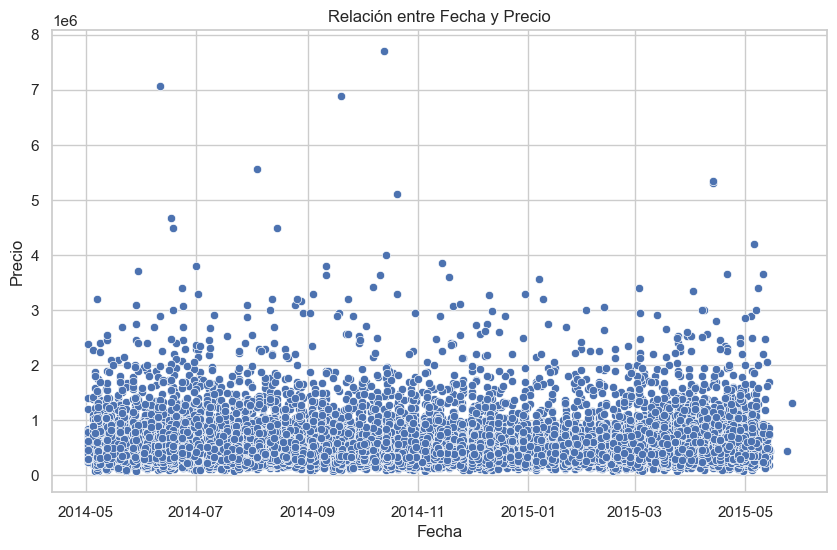

In [16]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='date', y='price')
plt.title('Relación entre Fecha y Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()


In [20]:
# Cargar tus datos en un DataFrame
data = pd.read_csv('kc_house_data.csv')

# Seleccionar las columnas deseadas
selected_columns = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'yr_built', 'yr_renovated', 'zipcode']

# Convertir la columna 'bathrooms' a números enteros
data['bathrooms'] = data['bathrooms'].astype(int)

# Crear un nuevo DataFrame con las columnas seleccionadas
selected_data = data.loc[:, selected_columns]

# Imprimir el nuevo DataFrame
print(selected_data)

       sqft_living  bedrooms  bathrooms  floors  waterfront  view  grade  \
0             1180         3          1     1.0           0     0      7   
1             2570         3          2     2.0           0     0      7   
2              770         2          1     1.0           0     0      6   
3             1960         4          3     1.0           0     0      7   
4             1680         3          2     1.0           0     0      8   
...            ...       ...        ...     ...         ...   ...    ...   
21608         1530         3          2     3.0           0     0      8   
21609         2310         4          2     2.0           0     0      8   
21610         1020         2          0     2.0           0     0      7   
21611         1600         3          2     2.0           0     0      8   
21612         1020         2          0     2.0           0     0      7   

       yr_built  yr_renovated  zipcode  
0          1955             0    98178  
1    